# LLM Benchmarks

This notebook creates insights into the benchmark / performances of our quantized LLMs.

## GGUF Llama-quantize / k-Quantization

**TinyLlama 2-bit Quantization**

In [ ]:
import pandas as pd

data_benchmark_2bit = {
    "question": ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6"],
    "total_duration_in_sec": [14.86, 13.25, 35.91, 46.65, 218.74, 23.22],
    "eval_rate_tokens_per_sec": [6.05, 5.93, 5.66, 5.47, 4.79, 4.32],
    "eval_duration_in_sec": [11.72, 9.60, 32.69, 43.17, 212.73, 16.67],
    "eval_count": [71, 57, 185, 236, 1018, 72]
}

df_2bit = pd.DataFrame(data_benchmark_2bit)
df_2bit.head(6)

,question,total_duration_in_sec,eval_rate_tokens_per_sec,eval_duration_in_sec,eval_count
0,Q1,14.86,6.05,11.72,71
1,Q2,13.25,5.93,9.60,57
2,Q3,35.91,5.66,32.69,185
3,Q4,46.65,5.47,43.17,236
4,Q5,218.74,4.79,212.73,1018
5,Q6,23.22,4.32,16.67,72


In [ ]:
data_benchmark_4bit = {
    "question": ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6"],
    "total_duration_in_sec": [4.42, 4.87, 23.42, 32.00, 130.87, 68.44],
    "eval_rate_tokens_per_sec": [6.83, 6.87, 6.13, 6.15, 5.51, 4.89],
    "eval_duration_in_sec": [1.75, 1.74, 20.70, 29.08, 125.81, 63.17],
    "eval_count": [12, 12, 127, 179, 693, 389]
}

df_4bit = pd.DataFrame(data_benchmark_4bit)
df_4bit.head(6)

,question,total_duration_in_sec,eval_rate_tokens_per_sec,eval_duration_in_sec,eval_count
0,Q1,4.42,6.83,1.75,12
1,Q2,4.87,6.87,1.74,12
2,Q3,23.42,6.13,20.70,127
3,Q4,32.00,6.15,29.08,179
4,Q5,130.87,5.51,125.81,693
5,Q6,68.44,4.89,63.17,389


In [ ]:
data_benchmark_8bit = {
    "question": ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6"],
    "total_duration_in_sec": [14.98, 10.46, 42.68, 49.68, 92.24, 29.56],
    "eval_rate_tokens_per_sec": [4.82, 4.84, 4.79, 4.64, 4.26, 4.05],
    "eval_duration_in_sec": [12.23, 7.43, 39.64, 46.79, 108.42, 24.44],
    "eval_count": [59, 36, 198, 217, 462, 99]
}

df_8bit = pd.DataFrame(data_benchmark_8bit)
df_8bit.head(6)

,question,total_duration_in_sec,eval_rate_tokens_per_sec,eval_duration_in_sec,eval_count
0,Q1,14.98,4.82,12.23,59
1,Q2,10.46,4.84,7.43,36
2,Q3,42.68,4.79,39.64,198
3,Q4,49.68,4.64,46.79,217
4,Q5,92.24,4.26,108.42,462
5,Q6,29.56,4.05,24.44,99


In [ ]:
def average_total_duration(df):
  if "total_duration_in_sec" in df.columns:
    return df["total_duration_in_sec"].mean()
  else:
    raise ValueError("Total Duration Column not present in passed dataframe")

In [ ]:
avg_2bit = average_total_duration(df_2bit)
avg_4bit = average_total_duration(df_4bit)
avg_8bit = average_total_duration(df_8bit)

print("Average Duration 2-bit: ", avg_2bit)
print("Average Duration 4-bit: ", avg_4bit)
print("Average Duration 8-bit: ", avg_8bit)

Average Duration 2-bit:  58.77166666666667
Average Duration 4-bit:  44.00333333333333
Average Duration 8-bit:  39.93333333333334


It took on average 58 seconds to generate answers to all questions for the 2-bit variant, 44 seconds for the 4-bit variant and 39 seconds on average for the 8-bit variant.

In [ ]:
def average_token_per_sec(df):
  if "eval_rate_tokens_per_sec" in df.columns:
    return df["eval_rate_tokens_per_sec"].mean()
  else:
    raise ValueError("Eval Rate Column not present in passed dataframe")

In [ ]:
avg_tps_2bit = average_token_per_sec(df_2bit)
avg_tps_4bit = average_token_per_sec(df_4bit)
avg_tps_8bit = average_token_per_sec(df_8bit)

print("Average TPS 2-bit: ", avg_tps_2bit)
print("Average TPS 4-bit: ", avg_tps_4bit)
print("Average TPS 8-bit: ", avg_tps_8bit)

Average TPS 2-bit:  5.37
Average TPS 4-bit:  6.063333333333333
Average TPS 8-bit:  4.566666666666667


In [ ]:
def average_eva_count(df):
  if "eval_count" in df.columns:
    return df["eval_count"].mean()
  else:
    raise ValueError("eval_count Column not present in passed dataframe")

In [ ]:
avg_ec_2bit = average_eva_count(df_2bit)
avg_ec_4bit = average_eva_count(df_4bit)
avg_ec_8bit = average_eva_count(df_8bit)

print("Average Eval Count 2-bit: ", avg_ec_2bit)
print("Average Eval Count 4-bit: ", avg_ec_4bit)
print("Average Eval Count 8-bit: ", avg_ec_8bit)


Average Eval Count 2-bit:  273.1666666666667
Average Eval Count 4-bit:  235.33333333333334
Average Eval Count 8-bit:  178.5


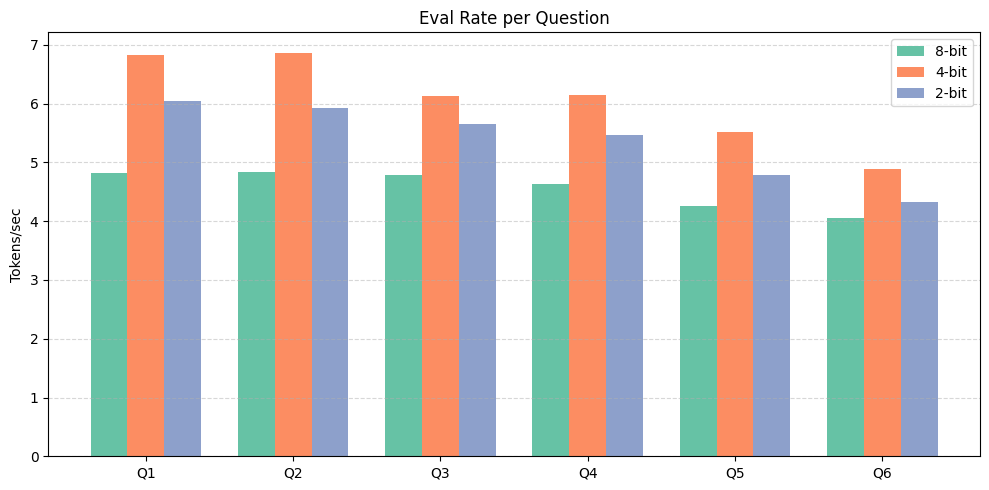

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data (add the third benchmark values below)
questions = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6"]
tokens_8bit = [4.82, 4.84, 4.79, 4.64, 4.26, 4.05]
tokens_4bit = [6.83, 6.87, 6.13, 6.15, 5.51, 4.89]
tokens_2_bit = [6.05, 5.93, 5.66, 5.47, 4.79, 4.32]

x = np.arange(len(questions))  # positions for each group
width = 0.25

fig, ax = plt.subplots(figsize=(10, 5))
bar1 = ax.bar(x - width, tokens_8bit, width, label='8-bit', color='#66c2a5')
bar2 = ax.bar(x, tokens_4bit, width, label='4-bit', color='#fc8d62')
bar3 = ax.bar(x + width, tokens_2_bit, width, label='2-bit', color='#8da0cb')

# Labels & formatting
ax.set_ylabel('Tokens/sec')
ax.set_title('Eval Rate per Question')
ax.set_xticks(x)
ax.set_xticklabels(questions)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

**Comparison Tokens/sec For Q1 Across All Model Variants**

Inspiration: https://www.inferless.com/learn/exploring-llms-speed-benchmarks-independent-analysis

Total Tokens = Sum of Input Tokens and Output Tokens

[14.98 10.46 42.68 49.68 92.24 29.56]
[  4.42   4.87  23.42  32.   130.87  68.44]
[ 14.86  13.25  35.91  46.65 218.74  23.22]


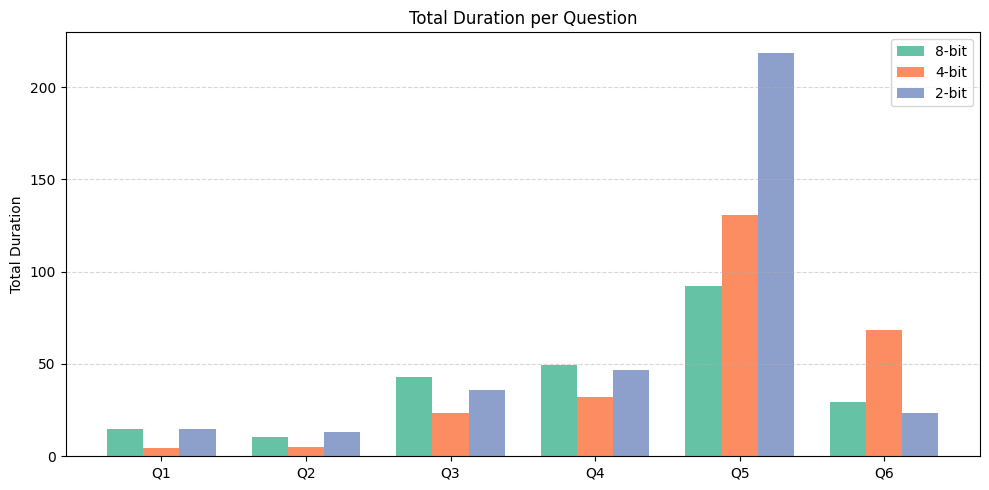

In [ ]:

total_dur_8bit = df_8bit["total_duration_in_sec"].values
total_dur_4bit = df_4bit["total_duration_in_sec"].values
total_dur_2bit = df_2bit["total_duration_in_sec"].values

print(total_dur_8bit)
print(total_dur_4bit)
print(total_dur_2bit)

questions = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6"]


x = np.arange(len(questions))  # positions for each group
width = 0.25

fig, ax = plt.subplots(figsize=(10, 5))
bar1 = ax.bar(x - width, total_dur_8bit, width, label='8-bit', color='#66c2a5')
bar2 = ax.bar(x, total_dur_4bit, width, label='4-bit', color='#fc8d62')
bar3 = ax.bar(x + width, total_dur_2bit, width, label='2-bit', color='#8da0cb')

# Labels & formatting
ax.set_ylabel('Total Duration')
ax.set_title('Total Duration per Question')
ax.set_xticks(x)
ax.set_xticklabels(questions)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

[ 59  36 198 217 462  99]
[ 12  12 127 179 693 389]
[  71   57  185  236 1018   72]


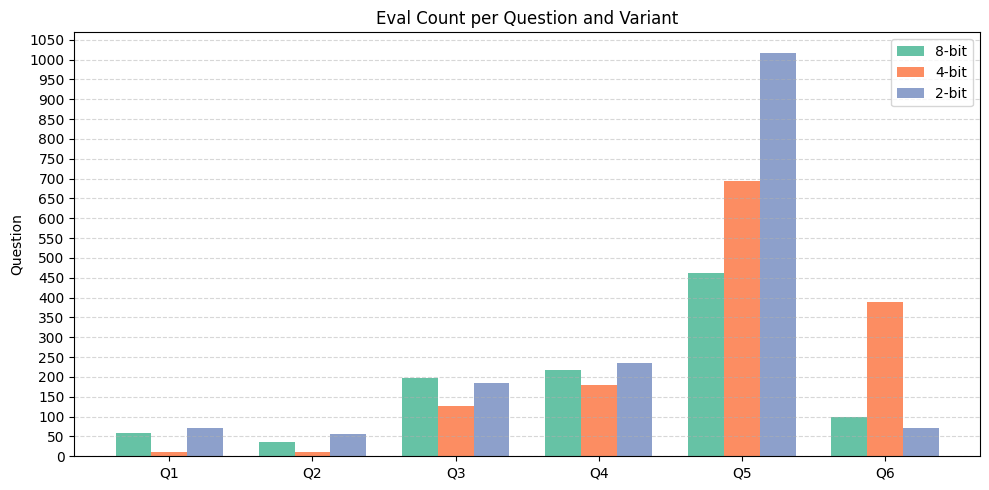

In [ ]:
eval_count_8bit = df_8bit["eval_count"].values
eval_count_4bit = df_4bit["eval_count"].values
eval_count_2bit = df_2bit["eval_count"].values

print(eval_count_8bit)
print(eval_count_4bit)
print(eval_count_2bit)

questions = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6"]


x = np.arange(len(questions))  # positions for each group
width = 0.25

fig, ax = plt.subplots(figsize=(10, 5))
bar1 = ax.bar(x - width, eval_count_8bit, width, label='8-bit', color='#66c2a5')
bar2 = ax.bar(x, eval_count_4bit, width, label='4-bit', color='#fc8d62')
bar3 = ax.bar(x + width, eval_count_2bit, width, label='2-bit', color='#8da0cb')

# Labels & formatting
ax.set_ylabel('Question')
ax.set_title('Eval Count per Question and Variant')
ax.set_xticks(x)
ax.set_xticklabels(questions)
ax.set_yticks(range(0, 1100, 50))
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Use Tegrastats RAM Data for 8bit Variant

In [1]:
import pandas as pd

df_tegra_8bit = pd.read_csv('/content/8bit-tegrastats-logs.csv', skiprows=1)
df_tegra_8bit.head()

,Index,Time (mS),Used RAM (MB),Total RAM (MB),Number of Free RAM Blocks,Size of Free RAM Blocks (MB),Used SWAP (MB),Total SWAP (MB),Cached SWAP (MB),CPU Frequency (MHz),...,PMIC Temperature (C),GPU Temperature (C),AO Temperature (C),thermal Temperature (C),Current POM_5V_IN Power Consumption (mW),Average POM_5V_IN Power Consumption (mW),Current POM_5V_GPU Power Consumption (mW),Average POM_5V_GPU Power Consumption (mW),Current POM_5V_CPU Power Consumption (mW),Average POM_5V_CPU Power Consumption (mW)
0,0,0,1542.0,3956.0,119.0,4.0,66.0,1978.0,1.0,102.0,...,50.0,32.5,41.5,33.00,1033.0,1033.0,41.0,41.0,124.0,124.0
1,1,1000,1542.0,3956.0,119.0,4.0,66.0,1978.0,1.0,102.0,...,50.0,32.5,41.5,33.50,1074.0,1053.0,82.0,61.0,124.0,124.0
2,2,2000,1542.0,3956.0,119.0,4.0,66.0,1978.0,1.0,307.0,...,50.0,32.5,41.5,33.25,1074.0,1060.0,41.0,54.0,165.0,137.0
3,3,3000,1542.0,3956.0,119.0,4.0,66.0,1978.0,1.0,204.0,...,50.0,33.5,41.5,33.25,993.0,1043.0,0.0,41.0,124.0,134.0
4,4,4000,1542.0,3956.0,119.0,4.0,66.0,1978.0,1.0,102.0,...,50.0,32.5,41.5,33.75,1033.0,1041.0,41.0,41.0,124.0,132.0


In [2]:
df_tegra_8bit.columns

Index(['Index', 'Time (mS)', 'Used RAM (MB)', 'Total RAM (MB)',
       'Number of Free RAM Blocks', 'Size of Free RAM Blocks (MB)',
       'Used SWAP (MB)', 'Total SWAP (MB)', 'Cached SWAP (MB)',
       'CPU Frequency (MHz)', 'CPU 0 Load (%)', 'CPU 1 Load (%)',
       'CPU 2 Load (%)', 'CPU 3 Load (%)', 'APE frequency (MHz)',
       'Used GR3D (%)', 'GR3D Frequency (MHz)', 'Used EMC (%)',
       'PLL Temperature (C)', 'CPU Temperature (C)', 'PMIC Temperature (C)',
       'GPU Temperature (C)', 'AO Temperature (C)', 'thermal Temperature (C)',
       'Current POM_5V_IN Power Consumption (mW)',
       'Average POM_5V_IN Power Consumption (mW)',
       'Current POM_5V_GPU Power Consumption (mW)',
       'Average POM_5V_GPU Power Consumption (mW)',
       'Current POM_5V_CPU Power Consumption (mW)',
       'Average POM_5V_CPU Power Consumption (mW)'],
      dtype='object')

In [3]:
df_tegra_8bit['Used RAM (MB)'].mean()

np.float64(2099.939655172414)

In [ ]:
df_tegra_8bit['Used RAM (MB)']

,Used RAM (MB)
0,1542.0
1,1542.0
2,1542.0
3,1542.0
4,1542.0
...,...
111,2602.0
112,2602.0
113,2602.0
114,2602.0


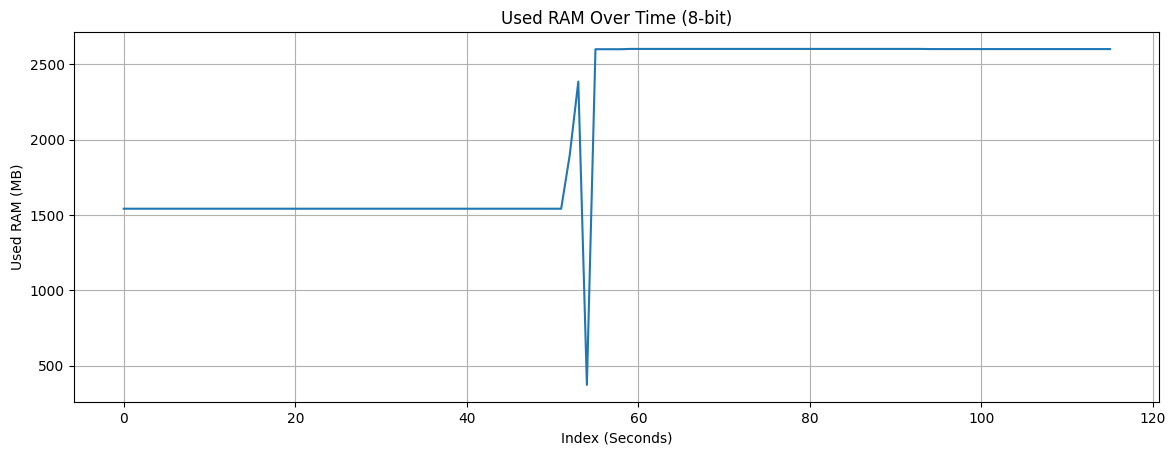

In [ ]:
plt.figure().set_figwidth(14)
plt.plot(df_tegra_8bit['Index'], df_tegra_8bit['Used RAM (MB)'])
plt.xlabel('Index (Seconds)')
plt.ylabel('Used RAM (MB)')
plt.title('Used RAM Over Time (8-bit)')
plt.grid(True)
plt.show()

**RAM 2-bit Variant**

In [4]:
import pandas as pd

df_tegra_2bit = pd.read_csv('/content/tegrastats-log-q2.csv', skiprows=1)
df_tegra_2bit.head()

,Index,Time (mS),Used RAM (MB),Total RAM (MB),Number of Free RAM Blocks,Size of Free RAM Blocks (MB),Used SWAP (MB),Total SWAP (MB),Cached SWAP (MB),CPU Frequency (MHz),...,PMIC Temperature (C),GPU Temperature (C),AO Temperature (C),thermal Temperature (C),Current POM_5V_IN Power Consumption (mW),Average POM_5V_IN Power Consumption (mW),Current POM_5V_GPU Power Consumption (mW),Average POM_5V_GPU Power Consumption (mW),Current POM_5V_CPU Power Consumption (mW),Average POM_5V_CPU Power Consumption (mW)
0,0,0,1396.0,3956.0,51.0,4.0,228.0,1978.0,2.0,102.0,...,50.0,32.5,41.5,32.75,1401.0,1237.0,164.0,102.0,164.0,144.0
1,1,1000,1408.0,3956.0,50.0,4.0,228.0,1978.0,2.0,1479.0,...,50.0,33.5,41.5,32.75,2401.0,1625.0,0.0,68.0,854.0,380.0
2,2,2000,1422.0,3956.0,50.0,4.0,228.0,1978.0,2.0,204.0,...,50.0,32.5,41.5,33.25,2003.0,1719.0,40.0,61.0,163.0,326.0
3,3,3000,1426.0,3956.0,50.0,4.0,228.0,1978.0,2.0,204.0,...,50.0,32.5,41.5,33.00,1966.0,1769.0,40.0,57.0,163.0,293.0
4,4,4000,1427.0,3956.0,50.0,4.0,228.0,1978.0,2.0,204.0,...,50.0,32.5,41.5,33.00,2003.0,1808.0,81.0,61.0,163.0,271.0


In [5]:
df_tegra_2bit.columns

Index(['Index', 'Time (mS)', 'Used RAM (MB)', 'Total RAM (MB)',
       'Number of Free RAM Blocks', 'Size of Free RAM Blocks (MB)',
       'Used SWAP (MB)', 'Total SWAP (MB)', 'Cached SWAP (MB)',
       'CPU Frequency (MHz)', 'CPU 0 Load (%)', 'CPU 1 Load (%)',
       'CPU 2 Load (%)', 'CPU 3 Load (%)', 'APE frequency (MHz)',
       'Used GR3D (%)', 'GR3D Frequency (MHz)', 'Used EMC (%)',
       'PLL Temperature (C)', 'CPU Temperature (C)', 'PMIC Temperature (C)',
       'GPU Temperature (C)', 'AO Temperature (C)', 'thermal Temperature (C)',
       'Current POM_5V_IN Power Consumption (mW)',
       'Average POM_5V_IN Power Consumption (mW)',
       'Current POM_5V_GPU Power Consumption (mW)',
       'Average POM_5V_GPU Power Consumption (mW)',
       'Current POM_5V_CPU Power Consumption (mW)',
       'Average POM_5V_CPU Power Consumption (mW)'],
      dtype='object')

In [6]:
df_tegra_2bit['Used RAM (MB)'].mean()

np.float64(1575.9217391304348)

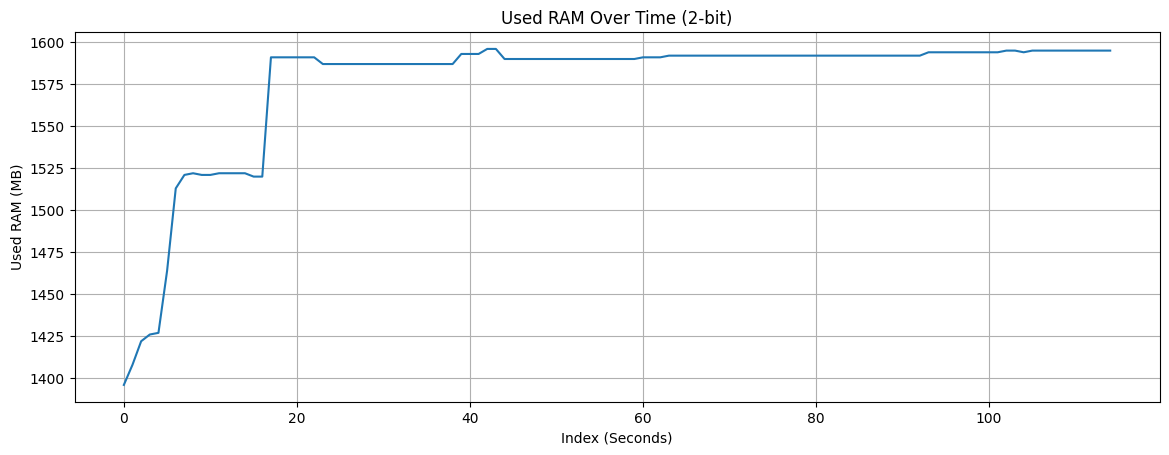

In [ ]:
plt.figure().set_figwidth(14)
plt.plot(df_tegra_2bit['Index'], df_tegra_2bit['Used RAM (MB)'])
plt.xlabel('Index (Seconds)')
plt.ylabel('Used RAM (MB)')
plt.title('Used RAM Over Time (2-bit)')
plt.grid(True)
plt.show()

**RAM 4-bit Variant**


In [7]:
import pandas as pd

df_tegra_4bit = pd.read_csv('/content/tegrastats-log-q4.csv', skiprows=1)
df_tegra_4bit.head()

,Index,Time (mS),Used RAM (MB),Total RAM (MB),Number of Free RAM Blocks,Size of Free RAM Blocks (MB),Used SWAP (MB),Total SWAP (MB),Cached SWAP (MB),CPU Frequency (MHz),...,PMIC Temperature (C),GPU Temperature (C),AO Temperature (C),thermal Temperature (C),Current POM_5V_IN Power Consumption (mW),Average POM_5V_IN Power Consumption (mW),Current POM_5V_GPU Power Consumption (mW),Average POM_5V_GPU Power Consumption (mW),Current POM_5V_CPU Power Consumption (mW),Average POM_5V_CPU Power Consumption (mW)
0,0,0,1402.0,3956.0,51.0,4.0,229.0,1978.0,2.0,403.0,...,50.0,32.5,41.5,32.75,1155.0,1114.0,41.0,61.0,206.0,165.0
1,1,1000,1402.0,3956.0,51.0,4.0,229.0,1978.0,2.0,102.0,...,50.0,33.5,41.5,33.00,993.0,1074.0,0.0,41.0,124.0,151.0
2,2,2000,1402.0,3956.0,51.0,4.0,229.0,1978.0,2.0,102.0,...,50.0,32.5,41.5,33.00,1074.0,1074.0,41.0,41.0,165.0,154.0
3,3,3000,1402.0,3956.0,51.0,4.0,229.0,1978.0,2.0,102.0,...,50.0,32.5,41.5,32.75,1074.0,1074.0,41.0,41.0,124.0,148.0
4,4,4000,1402.0,3956.0,51.0,4.0,229.0,1978.0,2.0,102.0,...,50.0,32.5,41.5,32.75,1238.0,1101.0,123.0,54.0,165.0,151.0


In [8]:
df_tegra_4bit.columns

Index(['Index', 'Time (mS)', 'Used RAM (MB)', 'Total RAM (MB)',
       'Number of Free RAM Blocks', 'Size of Free RAM Blocks (MB)',
       'Used SWAP (MB)', 'Total SWAP (MB)', 'Cached SWAP (MB)',
       'CPU Frequency (MHz)', 'CPU 0 Load (%)', 'CPU 1 Load (%)',
       'CPU 2 Load (%)', 'CPU 3 Load (%)', 'APE frequency (MHz)',
       'Used GR3D (%)', 'GR3D Frequency (MHz)', 'Used EMC (%)',
       'PLL Temperature (C)', 'CPU Temperature (C)', 'PMIC Temperature (C)',
       'GPU Temperature (C)', 'AO Temperature (C)', 'thermal Temperature (C)',
       'Current POM_5V_IN Power Consumption (mW)',
       'Average POM_5V_IN Power Consumption (mW)',
       'Current POM_5V_GPU Power Consumption (mW)',
       'Average POM_5V_GPU Power Consumption (mW)',
       'Current POM_5V_CPU Power Consumption (mW)',
       'Average POM_5V_CPU Power Consumption (mW)'],
      dtype='object')

In [9]:
df_tegra_4bit['Used RAM (MB)'].mean()

np.float64(1510.784)

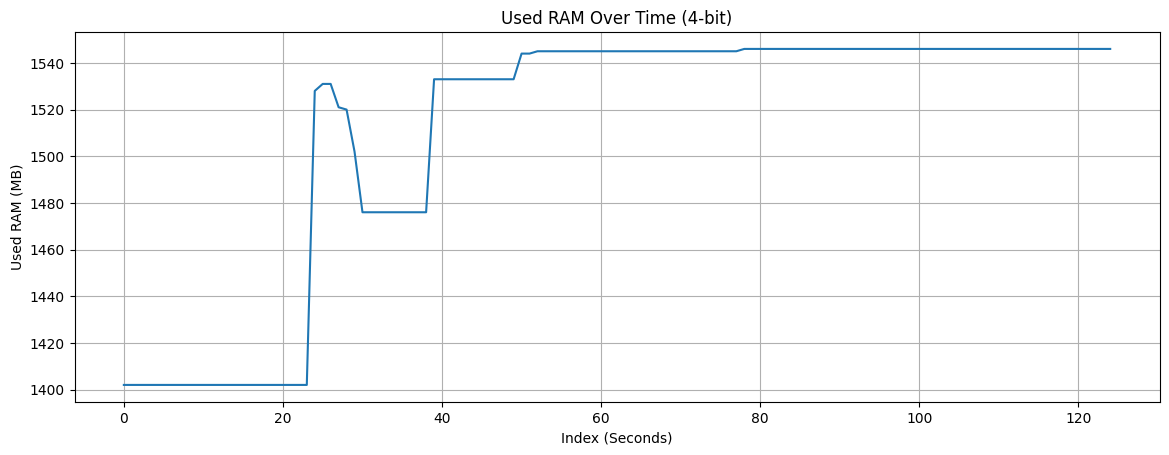

In [ ]:
plt.figure().set_figwidth(14)
plt.plot(df_tegra_4bit['Index'], df_tegra_4bit['Used RAM (MB)'])
plt.xlabel('Index (Seconds)')
plt.ylabel('Used RAM (MB)')
plt.title('Used RAM Over Time (4-bit)')
plt.grid(True)
plt.show()

In [ ]:
df_tegra_4bit["Used RAM (MB)"].max()

1546.0

In [ ]:
df_tegra_2bit["Used RAM (MB)"].max()

1596.0

In [ ]:
df_tegra_8bit["Used RAM (MB)"].max()

2603.0